## Import Libraries and Load Data

In [142]:
#general packages for data manipulation
import pandas as pd
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None

load csv file as pandas dataframe

In [143]:
data = pd.read_csv(r'C:\VSCode\NLP4B_Football\Own_model\labeled_normalized_data.csv')

#drop the first column because it is not necessary
data.drop(['Unnamed: 0'], axis=1, inplace=True)
print(data.head())
print(data.shape)

#copy to a new dataframe
df = data.copy()

                                             comment  source  label
0  As a woman you shouldn't complain about cleani...  kaggle      0
1  boy dats cold...tyga dwn bad for cuffin dat ho...  kaggle      1
2  Dawg!!!! You ever fuck a bitch and she start t...  kaggle      1
3  The shit you hear about me might be true or it...  kaggle      1
4  The shit just blows me..claim you so faithful ...  kaggle      1
(2398, 3)


# Text Cleaning

Find things to remove and how often they appear

In [144]:
# Function to check for pattern
def check_for_pattern(regex, dataframe, column_name):
    '''Function to check for how often a pattern appears in a dataframe column and returns a list of all the items found'''
    pattern = re.compile(regex)
    result = []
    for i in range(len(dataframe[column_name])):
        phrase = (re.findall(pattern, dataframe[column_name][i]))
        if phrase != []:
            result.append(phrase[0])
    print("Total items found:", len(result), result)
    return result

# Check for user handles
user_handles = check_for_pattern(r'@[\w]*', df, 'comment')

# Check for hashtags
hashtags = check_for_pattern(r'#[\w]*', df, 'comment')

# Check for URLs
urls = check_for_pattern(r'https?://[A-Za-z0-9./]+', df, 'comment')

# Check for punctuations
punctuations = check_for_pattern(r'[^\w\s]', df, 'comment')

# Check for numbers 18, 88, 1312
numbers = check_for_pattern(r'18|88|1312', df, 'comment')
#print rows with numbers 18, 88, 1312, show only the comment column and show the whole comment
print(numbers)
# --> no need to worry



Total items found: 5 ['@soccerboy_04', '@bluprint_4', '@KingCuh', '@WestYourMajesty', '@']
Total items found: 49 ['#Shots', '#2MW', '#HappyHumpDay', '#Eaglesnation', '#EarlyChristmas', '#CowboysNation', '#TehGodClan', '#Yankees', '#FreeMoneyMelle', '#oomf', '#scally', '#fixed', '#KingOfTheHill', '#UCFPINKPARTY', '#bum', '#hoesaintloyal', '#real', '#Pisces', '#GerrysHalloweenParty', '#MTVHottest', '#Yankees', '#ProtectTheAnimals', '#Damn', '#', '#blondeproblems', '#scally', '#History', '#frenchscally', '#YoureNotMyType', '#shitmybosssays', '#shitallysays', '#FreshRhymes', '#128514', '#JT2020Tour', '#50centmovie', '#ThankYouPaulForConfirmingLarry', '#NottingHill', '#8230', '#233', '#8230', '#RIPTALLT', '#65292', '#Tupac', '#afterearth', '#SNL', '#hoes', '#ShitFahdSays', '#redskins', '#1']
Total items found: 2 ['https://x.com/dfb', 'https://youtu.be/8dIQ56YACvE']
Total items found: 1829 ["'", '.', '!', '.', '.', ':', '.', '?', '.', "'", "'", '.', '#', '#', ',', '#', "'", '"', '.', "'", '"

Remove these patterns

In [145]:

# Remove user handles
df.replace(r'@[\w]*', '', regex=True, inplace=True)

# Remove hashtags
df.replace(r'#[\w]*', '', regex=True, inplace=True)

# Remove URLs
df.replace(r'https?://[A-Za-z0-9./]+', '', regex=True, inplace=True)

# Remove punctuations
df.replace(r'[^\w\s]', '', regex=True, inplace=True)

# Remove digits
df.replace(r'\d+', '', regex=True, inplace=True)


# show random 5 rows
df.sample(5, random_state=1)

,comment,source,label
1347,I meanhow good is Bellingham Crazy watching hi...,youtube,0
468,Stop being a pussy son and shove that needle i...,kaggle,1
1462,Unbelievable penalty given How on earth did th...,youtube,0
2265,Id like to reaffirm that Rice has been the be...,reddit,0
943,How often does Darren Fletcher say And theres ...,youtube,0


Decapitalize

In [146]:
df["comment"] = df["comment"].str.lower()

Tokenize

In [147]:
#tokenize using Tokenizer
tokenizer = WordPunctTokenizer()
df['comment'] = df['comment'].apply(tokenizer.tokenize)

#show random 5 rows
df.sample(5, random_state=2)


,comment,source,label
1649,"[shouldve, played, at, least, one, academy, pl...",youtube,0
1387,"[i, know, utd, blundered, a, goal, lead, but, ...",youtube,1
1766,"[a, lot, of, nigeria, fans, at, wembley]",youtube,0
1805,"[welbeck, and, ali, should, be, in, nigeria, t...",youtube,0
1861,"[awakenbeerus, is, a, true, sports, savant, hi...",youtube,0


Remove Stopwords

In [148]:

#remove stopwords
#nltk.download()
stopwords = stopwords.words('english')
df['comment'] = df['comment'].apply(lambda x: [item for item in x if item not in stopwords])

#show random 5 rows
df.sample(5, random_state=1)

,comment,source,label
1347,"[meanhow, good, bellingham, crazy, watching, l...",youtube,0
468,"[stop, pussy, son, shove, needle, heart]",kaggle,1
1462,"[unbelievable, penalty, given, earth, ref, give]",youtube,0
2265,"[id, like, reaffirm, rice, best, player, pitch]",reddit,0
943,"[often, darren, fletcher, say, theres, chance]",youtube,0


Remove special characters

In [149]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

# Apply the function to the 'comment' column
df['comment'] = df['comment'].apply(rem_nonalpha)

Remove digits

In [150]:
# Remove digits from each comment in the DataFrame
def remove_digits(comment):
    return [item for item in comment if not item.isdigit()]

# Apply the function to the 'comment' column
df['comment'] = df['comment'].apply(remove_digits)

Check for data balance

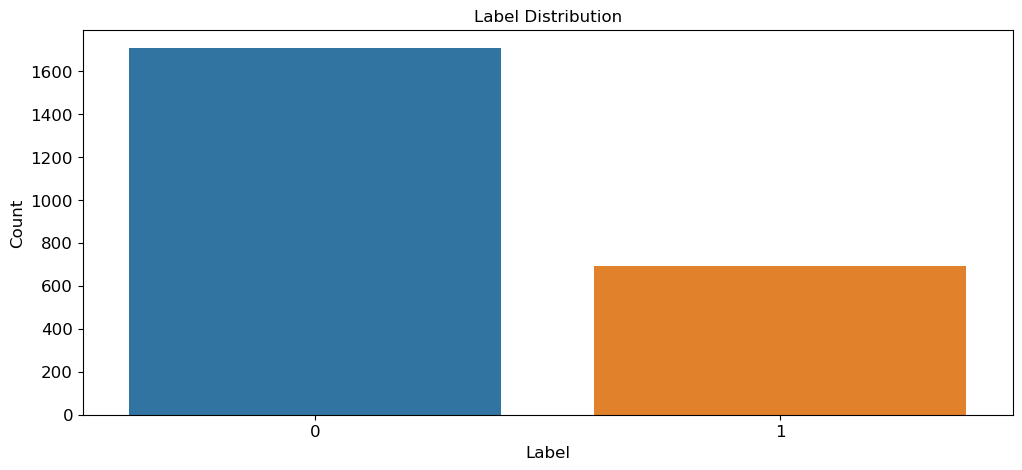

In [151]:
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




Explore most frequently used words

In [152]:
from collections import Counter
results = Counter()
df['comment'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('like', 204), ('bitch', 186), ('team', 139), ('game', 137), ('dont', 120), ('goal', 115), ('im', 113), ('england', 109), ('win', 103), ('one', 101)]


## Predictive Modelling

Data formatting and predictive modelling

In [153]:
# check for null values
print(f"Null values: {df.isnull().sum()}")

Null values: comment    0
source     0
label      0
dtype: int64


In [154]:
# join comments back together
df["comment"] = df["comment"].apply(lambda x: ' '.join(x))

# show random 5 rows
df.sample(5, random_state=1)

,comment,source,label
1347,meanhow good bellingham crazy watching last ni...,youtube,0
468,stop pussy son shove needle heart,kaggle,1
1462,unbelievable penalty given earth ref give,youtube,0
2265,id like reaffirm rice best player pitch,reddit,0
943,often darren fletcher say theres chance,youtube,0


In [155]:
#split data into input X and output y
X = df['comment']
y = df['label']

In [156]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1918,) (480,) (1918,) (480,)


In [157]:
# use TfidfVectorizer to convert the raw documents into feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)

(1918, 4576) (480, 4576)


# Model building: Ordinary logistics regression

In [158]:
# ordinary logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

Model evaluation

In [159]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# accuracy score
print(f"Train Accuracy: {accuracy_score(y_train, train_predictions)}")
print(f"Test Accuracy: {accuracy_score(y_test, test_predictions)}")

Train Accuracy: 0.8952033368091762
Test Accuracy: 0.8791666666666667


In [160]:
# classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

Train Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1352
           1       1.00      0.65      0.78       566

    accuracy                           0.90      1918
   macro avg       0.93      0.82      0.86      1918
weighted avg       0.91      0.90      0.89      1918

Test Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       355
           1       0.99      0.54      0.70       125

    accuracy                           0.88       480
   macro avg       0.92      0.77      0.81       480
weighted avg       0.89      0.88      0.87       480



Weighted logistic regression

In [161]:
# define the weight of the classes using inverse ratio
weights = {0: 1.0, 1:13.0}
#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
logreg = LogisticRegression(class_weight=weights)

#fit the model
logreg.fit(X_train, y_train)
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

Train Classification Report
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1352
           1       0.67      1.00      0.80       566

    accuracy                           0.85      1918
   macro avg       0.83      0.90      0.84      1918
weighted avg       0.90      0.85      0.86      1918

Test Classification Report
              precision    recall  f1-score   support

           0       0.94      0.63      0.75       355
           1       0.45      0.88      0.60       125

    accuracy                           0.69       480
   macro avg       0.69      0.75      0.67       480
weighted avg       0.81      0.69      0.71       480



Regularization and Hyperparameter Tuning

In [162]:
#grid search for best parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# check search space
print(space)




{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}


Fine tuned Model with Balanced Class Weights

In [163]:
# define the model with balanced class weights
model = LogisticRegression(class_weight='balanced')
# define the number of folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# define the search
search = RandomizedSearchCV(model, space, n_iter=100, scoring='f1', n_jobs=-1, cv=cv, random_state=1)
# fit grid search on the training dataset
result = search.fit(X_train, y_train)

c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

In [164]:
# retrieve the best model
best_model = result.best_estimator_
print(best_model)

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [165]:
#instantiate the best model
logreg = LogisticRegression(C=10, class_weight='balanced', penalty='l1', solver='liblinear')

In [166]:
#fit and predict
logreg.fit(X_train, y_train)
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

# confusion matrix
print("Train Confusion Matrix")
print(confusion_matrix(y_train, train_predictions))
print("Test Confusion Matrix")
print(confusion_matrix(y_test, test_predictions))


Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1352
           1       1.00      0.99      1.00       566

    accuracy                           1.00      1918
   macro avg       1.00      1.00      1.00      1918
weighted avg       1.00      1.00      1.00      1918

Test Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.86      0.75      0.80       125

    accuracy                           0.90       480
   macro avg       0.89      0.85      0.87       480
weighted avg       0.90      0.90      0.90       480

Train Confusion Matrix
[[1352    0]
 [   4  562]]
Test Confusion Matrix
[[340  15]
 [ 31  94]]


c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fine tuned model with class weights proportional to the class imbalance

In [167]:
#use the class weights to handle the imbalance in the labels
weights = {0:1.0,1:13}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
logreg = LogisticRegression(class_weight=weights)

#define the number of folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

#define the search
search = RandomizedSearchCV(logreg, space, n_iter=100, scoring='f1', n_jobs=-1, cv=cv, random_state=1)

#fit grid search on the training dataset
result = search.fit(X_train, y_train)

#retrieve the best model
best_model = result.best_estimator_
print(best_model)

c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=10, class_weight={0: 1.0, 1: 13}, penalty='l1',
                   solver='liblinear')


c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\proth\.conda\envs\NLP4B_Project\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

In [168]:
#instantiate the best model
logreg = LogisticRegression(C=10, class_weight=weights, penalty='l1', solver='liblinear')

#fit and predict
logreg.fit(X_train, y_train)
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1352
           1       1.00      0.99      1.00       566

    accuracy                           1.00      1918
   macro avg       1.00      1.00      1.00      1918
weighted avg       1.00      1.00      1.00      1918

Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       355
           1       0.82      0.78      0.80       125

    accuracy                           0.90       480
   macro avg       0.87      0.86      0.87       480
weighted avg       0.90      0.90      0.90       480



In [169]:
# confusion matrix
print("Train Confusion Matrix")
print(confusion_matrix(y_train, train_predictions))
print("Test Confusion Matrix")
print(confusion_matrix(y_test, test_predictions))



Train Confusion Matrix
[[1352    0]
 [   4  562]]
Test Confusion Matrix
[[333  22]
 [ 27  98]]
